## **TASK - 3 CUSTOMERS SEGMENTATION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [ ]:
#Load Datasets
Customers = pd.read_csv('/content/Customers.csv')
Products = pd.read_csv('/content/Products.csv')
Transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
# Parse date columns
Customers['SignupDate'] = pd.to_datetime(Customers['SignupDate'])
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])

In [ ]:
# Merge datasets
data = pd.merge(Transactions, Customers, on='CustomerID')
data = pd.merge(data, Products, on='ProductID')

In [ ]:
# Aggregate transaction data for customers
# Merge 'Price' column from Products DataFrame to data DataFrame
data = pd.merge(data, Products[['ProductID', 'Price']], on='ProductID', how='left')

Customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'  # Now 'Price' column is available
}).reset_index()

In [ ]:
# Merge with customer profile
Customer_profiles = pd.merge(Customers, Customer_features, on='CustomerID')

In [ ]:
# Encode categorical data (e.g., Region)
Customer_profiles = pd.get_dummies(Customer_profiles, columns=['Region'], drop_first=True)


In [ ]:
# Drop non-numeric columns for clustering
features = Customer_profiles.drop(['CustomerID', 'CustomerName', 'SignupDate'], axis=1)


In [ ]:
# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
# Perform K-Means Clustering
kmeans_model = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
clusters = kmeans_model.fit_predict(scaled_features)


In [ ]:
# Add cluster labels to the original data
Customer_profiles['Cluster'] = clusters

In [ ]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index (DB Index): {db_index:.4f}")

Davies-Bouldin Index (DB Index): 1.1715


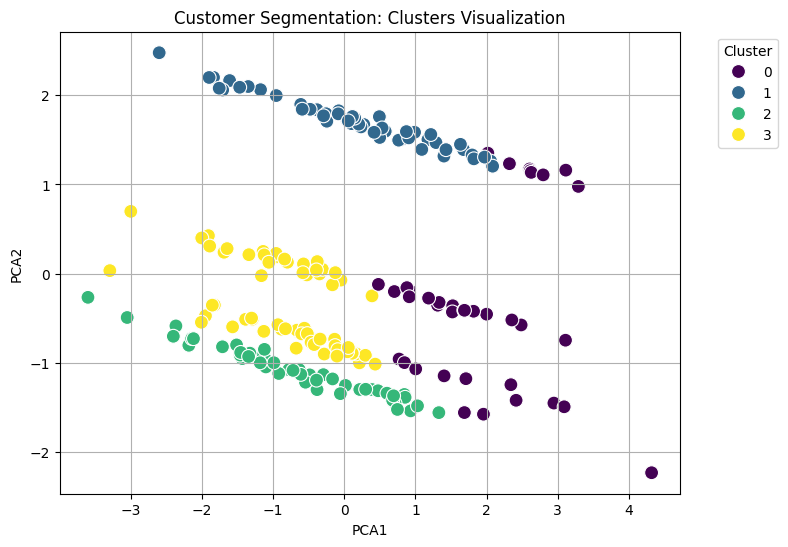

In [ ]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

Customer_profiles['PCA1'] = pca_features[:, 0]
Customer_profiles['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=Customer_profiles,
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation: Clusters Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [ ]:
# Analyze clusters
cluster_analysis = Customer_profiles.groupby('Cluster').agg({
    'TotalValue': ['mean', 'sum'],
    'Quantity': ['mean', 'sum'],
    'Price': 'mean'
}).reset_index()

print("\nCluster Analysis:")
print(cluster_analysis)

# Save clustered data to a CSV file
Customer_profiles.to_csv('Customer_Clusters.csv', index=False)



Cluster Analysis:
  Cluster   TotalValue              Quantity            Price
                  mean        sum       mean  sum        mean
0       0  6018.938378  222700.72  21.702703  803  279.864631
1       1  3266.155686  166573.94  11.901961  607  268.147954
2       2  3054.936383  143582.01  11.000000  517  269.442569
3       3  2455.295156  157138.89   9.531250  610  271.635804
